# Time Series Forecast Project of Closing Prices of Stocks

Accurate forecasting of stock prices is a crucial aspect of financial analysis, enabling investors and analysts to make informed decisions in the volatile world of financial markets.  
In this project, we explore time series forecasting techniques to predict the closing prices of different stocks, with a special focus on the Apple Inc. (AAPL) stock.  
By leveraging historical price data, we implement and evaluate various models, including ARIMA and SARIMA, to capture trends, seasonality, and other underlying patterns in the stock's price movements.  
The goal is to develop a robust model that can provide reliable future price estimates.  
Through careful data preprocessing, model selection, and performance evaluation, this project offers insights into the potential and limitations of time series forecasting in the context of stock market analysis.  

The companies which will be looked at are:

- Apple (AAPL)
- Microsoft (MSFT)
- NVIDIA (NVDA)
- Google (GOOG)

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf
from sklearn.metrics import mean_squared_error
import math
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import kpss, adfuller
from sklearn.model_selection import train_test_split
import warnings
# Suppress unnecessary warnings for visual reasons
warnings.filterwarnings("ignore")

# 1. Time Series Forecast

## 1.1 Fetching historical stock price data

Originally, data was scraped directly from the live stock market (this was done in a different project). Since this hasn't immediately delivered a sufficient amount of data, I went on to scrae csv-files from the website.  
Unfortunately, during the creation of this project, it wasn't possible to download files from the webiste anymore, without being logged in on it.  
This is why the library of yfinance was directly implemented. Through this it was possible to fetch data for a specific time period and for specific stocks, as it is showcased below.

In [2]:
# Create the ticker variable with the abbreviation for the company stock
# ticker = "AAPL"

# Create the starting and ending point in between which we want to fetch the data 
# period_1 = int(time.mktime(datetime.datetime(2020, 1, 1, 23, 59).timetuple()))
# period_2 = int(time.mktime(datetime.datetime(2023, 12, 31, 23, 59).timetuple()))
# Create a variable interval for the frequency of historical data (alternatively: 1d = 1 day; 1mo = 1 month)
# interval = "1d"

# Create the manipulated query string where all of the variables above can be implemented as needed
# query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period_1}&period2={period_2}&interval={interval}&events=history&includeAdjustedClose=true"

# Assing the downloaded csv file to a DataFrame
# df = pd.read_csv(query_string)

# Show DataFrame
# df

# Therefore we're going to use the yfinance library to get the data we needed

# Define the ticker and period
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-01-01"

# Fetch the data
stock_data = yf.download(ticker, start = start_date, end = end_date)

# Display the data
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200


Since this was only performed on one stock, we have to create a list of companies, over which we can iterate to fetch data for multiple companies.  
Also here: the original code doesn't work anymore without signing in, therefore we're using the yfinance library.

In [3]:
# List of stock ticker symbols
ticker_list = ["AAPL", "MSFT", "NVDA", "GOOG"]

# Create the starting and ending point in between which we want to fetch the data
# period_1 = int(time.mktime(datetime.datetime(2020, 1, 1, 23, 59).timetuple()))
# period_2 = int(time.mktime(datetime.datetime(2024, 7, 31, 23, 59).timetuple()))

# Create a variable interval for the frequency of historical data (alternatively: 1d = 1 day; 1mo = 1 month)
# interval = "1d"

# Initialize a dictionary to store DataFrames for each ticker
# dataframes = {}


# Loop over each ticker in the list
# for ticker in ticker_list:
    # Define the parameters for the URL
    # params = {
        # "period1": period_1,
        # "period2": period_2,
        # "interval": interval
    # }

    # Manipulated URL
    # url = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period_1}&period2={period_2}&interval={interval}&events=history&includeAdjustedClose=true"
      
    # try:
        # Assign the downloaded CSV file to a DataFrame
        # df = pd.read_csv(url)
        
        # Store the DataFrame in the dictionary with the ticker as the key
        # dataframes[ticker] = df
        
        # Print confirmation
        # print(f"Data for {ticker} fetched successfully.")
    
    # except Exception:
        # print(f"Failed to fetch data for {ticker}: {Exception}")# Initialize a dictionary to store DataFrames for each ticker

# Define the start and end dates for the data fetching
start_date = "2019-01-01"
end_date = "2024-07-31"

# Define the interval for the frequency of historical data (e.g., '1d' = 1 day, '1mo' = 1 month)
interval = "1d"

# Initialize a dictionary to store DataFrames for each ticker
dataframes = {}

# Loop over each ticker in the list
for ticker in ticker_list:
    try:
        # Fetch the historical data for each ticker
        df = yf.download(ticker, start=start_date, end=end_date, interval=interval)
        
        # Store the DataFrame in the dictionary with the ticker as the key
        dataframes[ticker] = df
        
        # Print confirmation
        print(f"Data for {ticker} fetched successfully.")
    
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")

# Optionally, save each DataFrame to a CSV file
for ticker, df in dataframes.items():
    df.to_csv(f"{ticker}_stock_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for AAPL fetched successfully.
Data for MSFT fetched successfully.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for NVDA fetched successfully.
Data for GOOG fetched successfully.


In [4]:
# Example: Accessing the DataFrame for NVIDIA
if "NVDA" in dataframes:
    print("Data for NVDA:")
    print(dataframes["NVDA"])

Data for NVDA:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02    3.266000    3.462000    3.251250    3.405500    3.378612   
2019-01-03    3.344750    3.379000    3.192250    3.199750    3.174486   
2019-01-04    3.273500    3.443250    3.242500    3.404750    3.377868   
2019-01-07    3.462500    3.622250    3.410750    3.585000    3.556695   
2019-01-08    3.667250    3.669500    3.422500    3.495750    3.468149   
...                ...         ...         ...         ...         ...   
2024-07-24  119.169998  119.949997  113.440002  114.250000  114.250000   
2024-07-25  113.040001  116.629997  106.300003  112.279999  112.279999   
2024-07-26  116.190002  116.199997  111.580002  113.059998  113.059998   
2024-07-29  113.690002  116.279999  111.300003  111.589996  111.589996   
2024-07-30  111.519997  111.989998  102.540001  103.730003  103.730003   

               Volume 

Now this can be used to retrieve data on different occasions and times to collect data for conducting analysises or machine learning tasks.  
To summarize this, we now do have DataFrames filled with stock data for 
- Apple (AAPL)
- Microsoft (MSFT)
- NVIDIA (NVDA)
- Google (GOOG)

We collected data for each day for the past five years, ranging from January 1st, 2019, to July 31st, 2024, and it includes the following 8 features for each trading session:
- Date: The Timestamp of the trading session as index
- Open: The opening price of the stock for the trading session
- High: The highest price of the stock during the trading session
- Low: The lowest price of the stock during the trading session
- Close: The closing price of the stock for the trading session
- Adj Close: The adjusted closing price of the stock (the closing price without i.e. dividends and stock splits)
- Volume: The number of shares traded during the trading session

For further analysis, we create seperate DataFrames for each company and concatenate them later on, equipped with a ticker corresponding to the company.

In [5]:
# Loop through the ticker symbols and assign DataFrames to global variables, also add a new column "Ticker" with the corresponding ticker
for ticker in dataframes:
    df_name = f"{ticker.lower()}_df"
    globals()[df_name] = dataframes[ticker]
    dataframes[ticker]["Ticker"] = ticker

# Now concatenate all DataFrames to create one single DataFrame containing all values
total_df = pd.concat([aapl_df, msft_df, nvda_df, goog_df], ignore_index = False)

# Show total length of the merged DataFrame
print(f"Number of rows in the dataset: {len(total_df)}")

total_df.head()

Number of rows in the dataset: 5612


,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.750084,148158800,AAPL
2019-01-03,35.994999,36.430000,35.500000,35.547501,33.989899,365248800,AAPL
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.440903,234428400,AAPL
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.362011,219111200,AAPL
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.036125,164101200,AAPL


## 1.2 Data Preparation

In [6]:
# Gain first insights to the whole dataset
total_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5612 entries, 2019-01-02 to 2024-07-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5612 non-null   float64
 1   High       5612 non-null   float64
 2   Low        5612 non-null   float64
 3   Close      5612 non-null   float64
 4   Adj Close  5612 non-null   float64
 5   Volume     5612 non-null   int64  
 6   Ticker     5612 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 350.8+ KB


At first we have to inspect the dataset and do the following steps:
1. Check for missing values
2. Check for duplicates
3. Convert the ```Date``` column to datetime type for Time Series Analysis
4. Check the number of companies in the ```Ticker``` column, since they should have equal numbers

After checking the info, we can see we have 0 null values, yet, for completeness reasons, it will still be considered with a line of code.

In [7]:
#1 Check for missing values
missing_values = total_df.isnull().sum()
print(missing_values)

# Additional break line between the outputs
print()

#2 Check for duplicates
duplicates = total_df.duplicated().sum()
print(f"Duplicates: {duplicates}")

# Additional break line between the outputs
print()

#3 Converting the Date column to datetime (not necessary anymore, since yfinance already hash the date as index)
# total_df["Date"] = pd.to_datetime(total_df["Date"])

#4 Checking the distributions of the companies
n_tickers = total_df["Ticker"].value_counts()
print(n_tickers)

# Rename the column "Adj Close" to "Adj_Close"
total_df.rename(columns = {"Adj Close" : "Adj_Close"}, inplace = True)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

Duplicates: 0

Ticker
AAPL    1403
MSFT    1403
NVDA    1403
GOOG    1403
Name: count, dtype: int64


Here we can see again, that we do have zero null values, zero duplicates and equally distributed data for each company (n = 1403). 

## 1.3 Exploratory Data Analysis

To visualize the dataset for the first time, we will plot the historical closing price for each company.

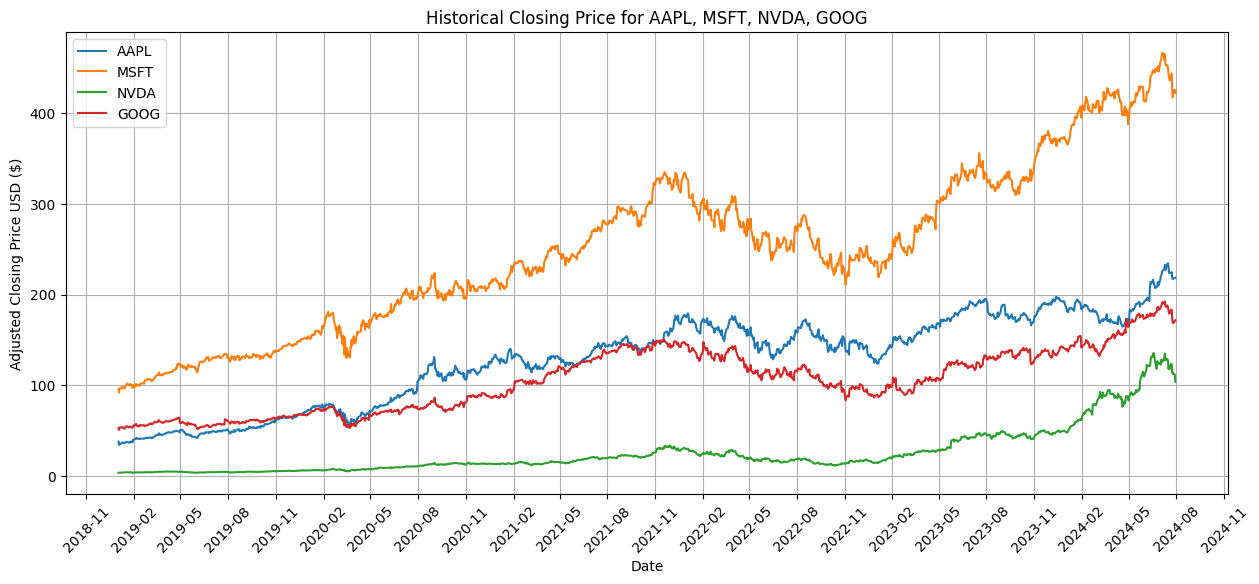

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot each ticker's data
for ticker in n_tickers.index:
    subset = total_df[total_df["Ticker"] == ticker]
    plt.plot(subset.index, subset["Adj_Close"], label = ticker)

# Rotate the date labels on the x-axis for better readability
plt.xticks(rotation = 45)
# Set the date format on the x-axis to show major ticks only for every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# Add Title
plt.title("Historical Closing Price for AAPL, MSFT, NVDA, GOOG")

# Add x-label
plt.xlabel("Date")

# Add y-label
plt.ylabel("Adjusted Closing Price USD ($)")

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In this chart we can see that all companies could increase their closing price over the last 5 years, with a small cushion for all companies in July 2024.  
We can further analyze the dataset to see which company had the highest trading volume. The higher the trading volume, the more it is a sign for increased market activity or other external factors which might have influenced the stock price.

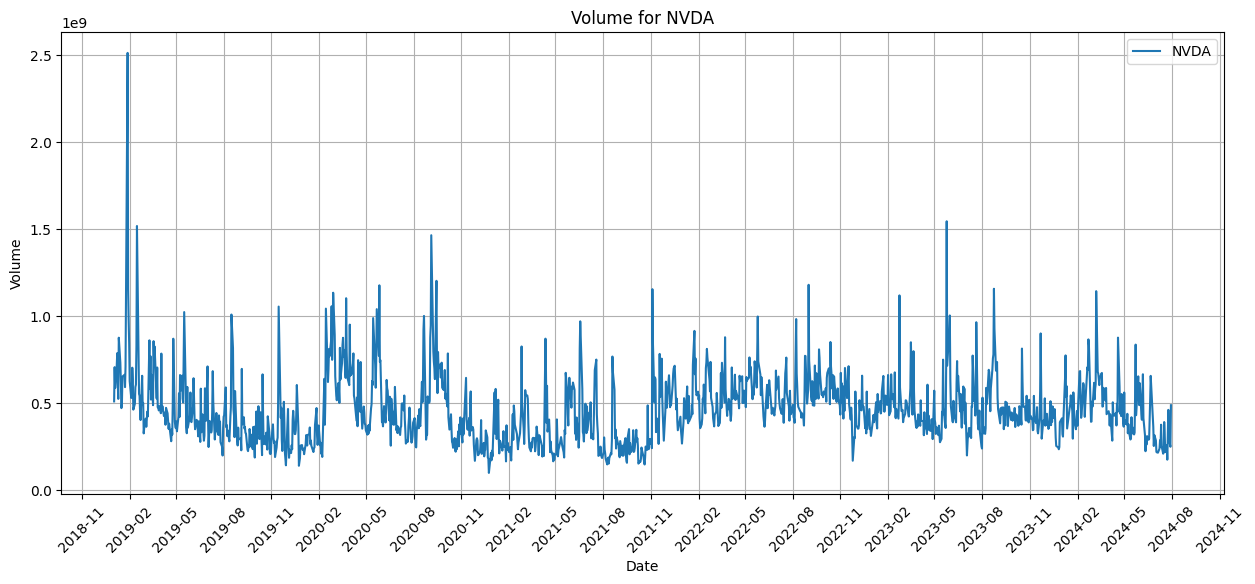

In [9]:
# Calculate the average volume for each company
avg_volumes = {ticker: df["Volume"].mean() for ticker, df in dataframes.items()}

# Find the company with the highest average volume
highest_avg_volume_company = max(avg_volumes, key = avg_volumes.get)

# Use the DataFrame corresponding to the company with the highest average volume
highest_volume_df = dataframes[highest_avg_volume_company]

# Plotting the volume for the selected company
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(highest_volume_df.index, highest_volume_df["Volume"], label = highest_avg_volume_company)
plt.xticks(rotation = 45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.title(f"Volume for {highest_avg_volume_company}")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()

In this graph we can see the trading volume for NVIDIA, which is the company with the highest average trading volume, depicted for the past 5 years.  
It clearly shows the highest 2 peaks in July 2020 (about 1.500.000.000 traded stocks) and June 2023 (about 1.550.000.000 traded stocks), which could be traced back to external reasons such as the rise of AI and the connection to NVDIA with it.  
Another reason for example could have been internal problems which have led to higher selling numbers.

In the next step, we want to take a look at the volatility of the closing stock price. This does give insights about how robust the stock price is considering internal or external factors such as the local/global economic states or crises.  
To see which company does show the highest volatility, we can compute this by calculating the standard deviation for each ticker in the dictionary ```dataframes```. Our frequency is monthly, since this should be enough to make a statement.
The standard deviation is a statistical measurement which quantifies the amount of variation in a given dataset. It is the square root of the sum of each value substracted with the mean, divided by the number of observations (datapoints).  
```σ = sqrt( (1/N) * Σ(x_i - μ)^2 )```

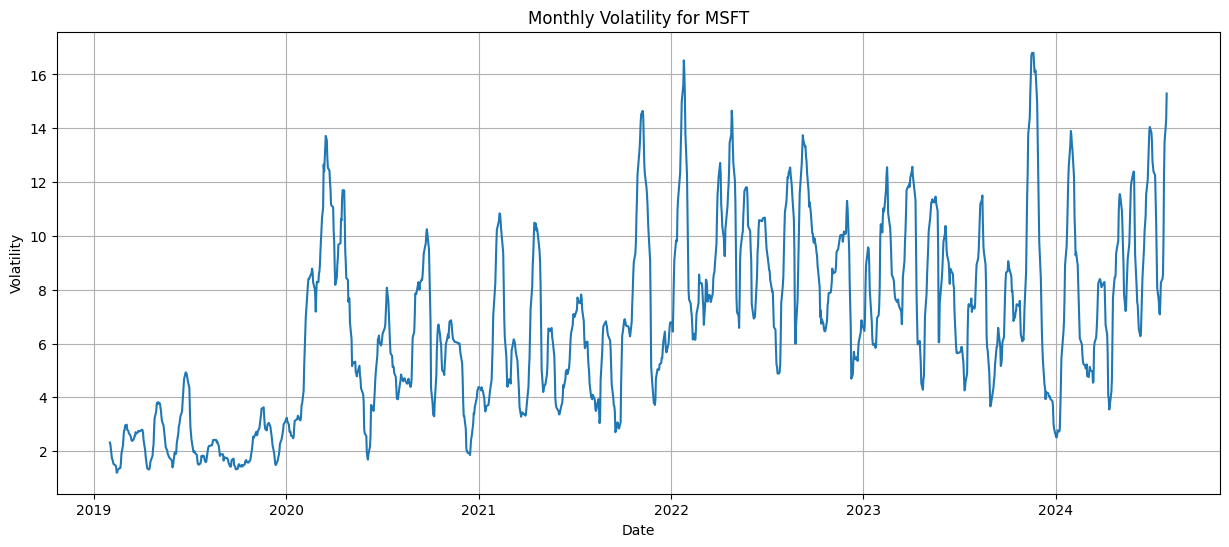

In [10]:
# Calculate the 30-day rolling standard deviation (volatility) for each company with n = 21, since average trading days are 21 month
for ticker, df in dataframes.items():
    df["monthly_volatility"] = df["Adj Close"].rolling(window = 21).std()

# Calculate the average volatility for each company (ignoring NaN values (the first 20 days))
avg_volatilities = {ticker: df["monthly_volatility"].mean(skipna = True) for ticker, df in dataframes.items()}

# Find the company with the highest average volatility
highest_avg_volatility_company = max(avg_volatilities, key = avg_volatilities.get)

# Use the DataFrame corresponding to the company with the highest average volatility
highest_volatility_df = dataframes[highest_avg_volatility_company]

# Plotting the 30-day rolling volatility for the selected company
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(highest_volatility_df.index, highest_volatility_df["monthly_volatility"])
plt.title(f"Monthly Volatility for {highest_avg_volatility_company}")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()

This graph shows, that Microsoft (MSFT) is the company with the highest average monthly volatility.  
The plot can be interpretated as the company does experience more pronounced price fluctuations on average, suggesting higher risks but also higher returns for investments.

## 1.4 Statistical Analysis

In this section we will take a look at basic statistical parameters to gain further insights to the fetched data. To gain a overview, we can compute some basic parameters at first.

In [11]:
aapl_df.describe()

,Open,High,Low,Close,Adj Close,Volume,monthly_volatility
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1.403000e+03,1383.000000
mean,129.844371,131.294416,128.498268,129.958970,128.192887,9.764198e+07,4.043375
std,48.923657,49.340276,48.494621,48.921167,49.214205,5.198122e+07,2.056532
min,35.994999,36.430000,35.500000,35.547501,33.989899,2.404830e+07,0.487107
25%,80.747501,81.176250,79.868752,80.869999,78.650818,6.382810e+07,2.552782
50%,142.270004,144.119995,140.350006,142.479996,140.477631,8.463240e+07,3.734876
75%,169.820007,171.360001,168.350006,169.730003,168.601166,1.149664e+08,5.442667
max,236.479996,237.229996,233.089996,234.820007,234.548523,4.265100e+08,10.160423


In [12]:
pd.set_option("display.float_format", "{:.3f}".format)
# show basic statistical parameters grouped by company
total_df.groupby("Ticker")[["Open", "Adj_Close", "Volume"]].describe().transpose()

Ticker                   AAPL          GOOG         MSFT           NVDA
Open      count      1403.000      1403.000     1403.000       1403.000
          mean        129.844       105.048      255.002         25.431
          std          48.924        34.696       88.455         26.687
          min          35.995        50.828       99.550          3.266
          25%          80.748        72.175      185.005          8.775
          50%         142.270       105.218      252.150         16.095
          75%         169.820       134.283      313.970         28.339
          max         236.480       191.750      467.000        139.800
Adj_Close count      1403.000      1403.000     1403.000       1403.000
          mean        128.193       104.894      249.796         25.409
          std          49.214        34.616       89.779         26.638
          min          33.990        50.679       91.988          3.174
          25%          78.651        71.925      177.671          8.740
          50%         140.478       104.962      247.719         16.153
          75%         168.601       134.084      309.407         28.246
          max         234.549       192.407      466.719        135.580
Volume    count      1403.000      1403.000     1403.000       1403.000
          mean   97641980.043  28242800.071 28528822.381  461889922.666
          std    51981218.301  12696798.242 12194593.950  195928551.367
          min    24048300.000   6936000.000  8989200.000   97884000.000
          25%    63828100.000  20133000.000 20873350.000  325463000.000
          50%    84632400.000  25240000.000 25645500.000  432817000.000
          75%   114966400.000  32271000.000 32689950.000  559831500.000
          max   426510000.000 124140000.000 97012700.000 2511528000.000

In this table we can see the basic statistical parameters for the ```Adj_Close``` column grouped by ticker in the ```total_df``` DataFrame.  
We can see that, e.g. for ```AAPL```, the value of the average ```Open``` price is ```$129.84``` and of the average ```Adj_Close``` price ```$128.193```.  
Additionally, it does exist a high variance across all columns, since the values for the open column, for ```AAPL```, lie between ```$36.00``` and ```$236.48```. Similiar analysis apply to the other columns. This can be traced back to the differences in the prices between 2019 and 2024.  
It can also be pointed out that the highest value for trading volume is ```2.5 billion``` shares, reached by ```NVDA```.  

In [13]:
# Set Date as the permanent index, which is required for resampling
# total_df.set_index("Date", inplace = True)

In [14]:
# Group data by daily intervals and calculate statistics for the "open" price
daily_summary = total_df["Open"].resample("D").agg(stats1d = lambda x: (round(np.mean(x), 3), round(np.std(x), 3), round(x.skew(), 3)) if not x.empty else np.nan)

In [15]:
# Drop all NaN values
daily_summary = daily_summary.dropna()

# Convert the output into a DataFrame
daily_summary = pd.DataFrame(daily_summary["stats1d"].tolist(),
                            index = daily_summary.index,
                            columns = ["mean", "std", "skewness"])
daily_summary

,mean,std,skewness
Date,,,
2019-01-02,48.092,34.469,0.480
2019-01-03,47.872,34.889,0.536
2019-01-04,47.689,34.746,0.534
2019-01-07,48.963,35.374,0.493
2019-01-08,49.476,35.820,0.526
...,...,...,...
2024-07-24,239.753,121.666,1.457
2024-07-25,233.755,118.717,1.410
2024-07-26,230.465,114.289,1.418


The DataFrame above shows the values for the mean, the standard deviation and theh skewness for all companies grouped by the date. It also ignored the time stamps where no data was available, i.e. on weekends.  
Next we will have a look at these parameteres, but for each company.

In [16]:
# Create an empty dictionary to store all values
summary_dict = {}

# Iterate over each ticker in the list ticker_list = ["AAPL", "MSFT",  "NVDA", "GOOG"]
for ticker in ticker_list:
    # Assign the DataFrame of ticker to variable df
    df = dataframes[ticker]

    # Make sure to only choose numeric columns (exclude date column and ticker column)
    numeric_df = df.select_dtypes(include = [float, int])
    
    # Calculate mean, standard deviation, and skewness for each company
    mean_values = numeric_df.mean()
    std_values = numeric_df.std()
    skew_values = numeric_df.skew()
    
    # Combine the results into a single DataFrame for better readability
    summary_df = pd.DataFrame({
        "Mean": mean_values,
        "Standard Deviation": std_values,
        "Skewness": skew_values
    })
    
    # Add ticker to the summary_df
    summary_df["Ticker"] = ticker

    # Append the current summary_df to the summary_dict
    summary_dict[ticker] = summary_df
    
# Combine all individual summary DataFrames into one DataFrame
final_summary_df = pd.concat(summary_dict.values())

final_summary_df

,Mean,Standard Deviation,Skewness,Ticker
Open,129.844,48.924,-0.408,AAPL
High,131.294,49.340,-0.418,AAPL
Low,128.498,48.495,-0.399,AAPL
Close,129.959,48.921,-0.409,AAPL
Adj Close,128.193,49.214,-0.386,AAPL
Volume,97641980.043,51981218.301,2.223,AAPL
monthly_volatility,4.043,2.057,0.499,AAPL
Open,255.002,88.455,0.227,MSFT
High,257.521,89.036,0.214,MSFT
Low,252.388,87.740,0.236,MSFT


## 1.5 Model Selection and Forecasting

A time series consists of three systematic components including level, trend, seasonality, and one non-systematic component called noise.
These components are defined as follows:
- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series. 

To choose a well fitting model, we have to consider the following points:
- Data Stationarity: Implies a constant mean and variance over time, so they do not differ significantly. Check if the data is stationary.
- Seasonality: Identify if the data has seasonal patterns and choose a model that can handle seasonality.
- Data Volume: For large datasets, machine learning models like LSTM or gradient boosting methods might be more appropriate.
- Model Interpretability: If interpretability is important, classic models like ARIMA or ETS are preferable.

Considering these steps, we will use the ARIMA (Autoregressive Integrated Moving Average), since it is a fairly simple model which can be trained on smaller datastets. The only thing we need to make sure here is to achieve stationarity.  

To test the dataset for stationarity, we do have three different methods:
- Rolling Statistics: Plot the moving average or moving variance and see if it varies with time (visual technique)
- Augmented Dickey-Fuller test (ADF): This tests for the null hypothesis H0: The time series is based on a unit root, resulting in non-stationarity. H1: The series has no unit root.
- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test: This tests for the null hypothesis that the time series is stationary around a deterministic trend.

For this project we plot the Rolling Mean and Rolling Standard Deviation, compute the ADF test and the KPSS test to check for stationarity. For simplicity we will focus on one company, in this case AAPL.  
Before performing any of these tasks, we are going to resample the data, from daily to monthly, to make it easier to detect trends or seasonalities. Additionally, we will only keep the ```Adj_Close``` column, since we will only use that.

In [17]:
# Extract all "AAPL" rows for this example:
aapl_df = total_df[total_df["Ticker"] == "AAPL"]
aapl_df.dropna(inplace = True)

# Keep Adj_Close column and convert the output of the colummns into monthly data 
aapl_df = aapl_df["Adj_Close"].resample("MS").mean().to_frame(name = "Adj_Close")

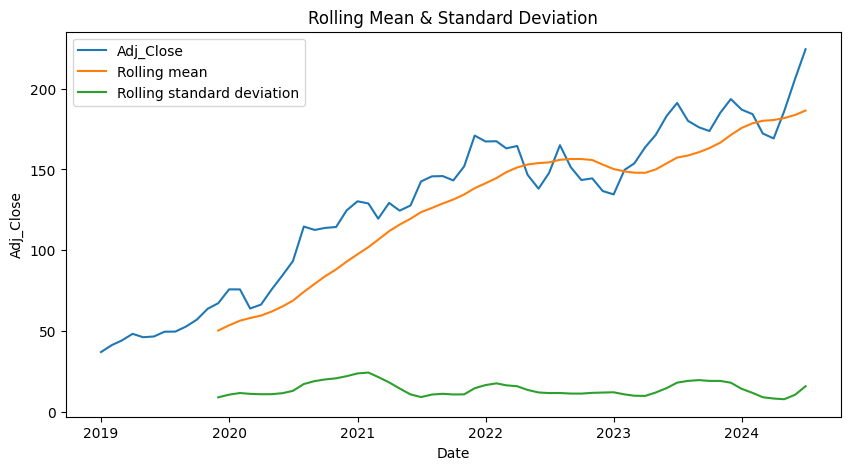

In [18]:
# Calculating Rolling Statistics (mean and standard deviation) as an example shown on "AAPL" (window = 12 because we want monthly rolling mean)
rol_mean = aapl_df["Adj_Close"].rolling(window = 12).mean()
rol_std = aapl_df["Adj_Close"].rolling(window = 12).std()

plt.figure(figsize = (10, 5))
sns.lineplot(data = aapl_df, x = aapl_df.index, y = aapl_df["Adj_Close"], label = "Adj_Close")
sns.lineplot(data = aapl_df, x = aapl_df.index, y = rol_mean, label = "Rolling mean")
sns.lineplot(data = aapl_df, x = aapl_df.index, y = rol_std, label = "Rolling standard deviation")
plt.legend()
plt.title("Rolling Mean & Standard Deviation")
plt.tight_layout
plt.show()

The plot above shows an increasing mean and fluctuating standard deviation over time, which is a first hint for non-stationarity.  
In the next step we compute the ADF-Test and the KPSS-Test.  
Having two tests which may or may not agree can be confusing. If KPSS and ADF agree that the series is stationary then we can consider it stationary and there’s no need to to use a difference term in the ARIMA model.  
If the ADF test finds a unit root but KPSS finds that the series is stationary around a deterministic trend then the series is trend-stationary, and it needs to be detrended.  
You can either difference the time series or use a Box-Cox transformation to remove the trend.  
If the ADF does not find a unit root but KPSS claims that it is non-stationary then the series is difference stationary. We'll need to difference the data before passing data to our autoregressive model.  
If KPSS and ADF agree that the series is non-stationary then we can consider it non-stationary. We'll need to difference the data before passing data to our autoregressive model (https://developer.ibm.com/tutorials/awb-arima-models-in-python/).  

In [19]:
def adf_test(series, title = ""):
    print(f'ADF-Test on "{title}"')
    # Compute the ADF test, autolag = "AIC" for choosing the number of lags to minimize the corresponding information criterion (here: AIC)
    result = adfuller(series, autolag = "AIC")
    labels = ["ADF Test Statistic", "p-value", "Lags used", "Number of Observations used"]
    # Select the first 4 components of the output of the ADF test (ADF Test Statistic, p-value, Lags Used, Number of Observations Used)
    out = pd.Series(result[0:4], index = labels)

    # Iterate over the 5th component of the ADF test (critical values) and compute the values 
    for key, value in result[4].items():
        out[f"Critical Value ({key})"] = value
        
    print(out.to_string()) 
    print()

adf_test(aapl_df["Adj_Close"])

ADF-Test on ""
ADF Test Statistic            -0.672
p-value                        0.854
Lags used                      2.000
Number of Observations used   64.000
Critical Value (1%)           -3.537
Critical Value (5%)           -2.908
Critical Value (10%)          -2.591



After calculating the test statistic and the p-value we can see that we cannot reject the null hypothesis: The data is not stationary
- AAPL: p-value = 0.854 > 0.05

As the last stationary test, we compute the KPSS test.  

In [20]:
def kpss_test(series, title = ""):
    """
    Performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test for stationarity on the given time series.

    The KPSS test is used to check whether a series is stationary around a constant (level stationarity).
    A low p-value (usually less than 0.05) indicates that the series is not stationary (has a unit root), 
    while a higher p-value suggests that the series is stationary.

    Parameters:
    - series: pd.Series
        The time series data to be tested for stationarity.
    - title: str, optional (default = "")
        A title or label to print alongside the KPSS test results for identification.

    Prints:
    - KPSS Test Statistic: The computed test statistic from the KPSS test.
    - p-value: The p-value associated with the test statistic. If below a certain threshold (e.g., 0.05), 
      the null hypothesis of stationarity is rejected.
    - Lags used: The number of lags used in the test.
    - Critical Values: The critical values for different significance levels (1%, 5%, and 10%), which provide 
      thresholds for rejecting or accepting the null hypothesis.

    Example usage:
    >>> kpss_test(data['Close'], title = "Close Price")
    """    

    print(f'KPSS-Test on "{title}"')
    # Compute the KPSS test, regression = "c" to test wether the data is stationary around a constant 
    kpss_result = kpss(series, regression = "c")
    labels = ["KPSS Test Statistic", "p-value", "Lags used"]
    # Select the first 3 components of the output of the KPSS test (KPSS Test Statistic, p-value, Lags Used)
    out = pd.Series(kpss_result[0:3], index = labels)

    # Iterate over the 4th component of the KPSS test (critical values) and compute the values 
    for key, value in kpss_result[3].items():
        out[f"Critical Value ({key})"] = value
        
    print(out.to_string()) 
    print()

kpss_test(aapl_df["Adj_Close"])

KPSS-Test on ""
KPSS Test Statistic     1.137
p-value                 0.010
Lags used               5.000
Critical Value (10%)    0.347
Critical Value (5%)     0.463
Critical Value (2.5%)   0.574
Critical Value (1%)     0.739



Analyzing the test results, we can see that the p-value = 0.01 < 0.05, which results in rejecting H0. Therefore the KPSS test proves the dataset to be non-stationary.  
To determine what we have to remove from the time series in order to fix it, we can decompose the stock.

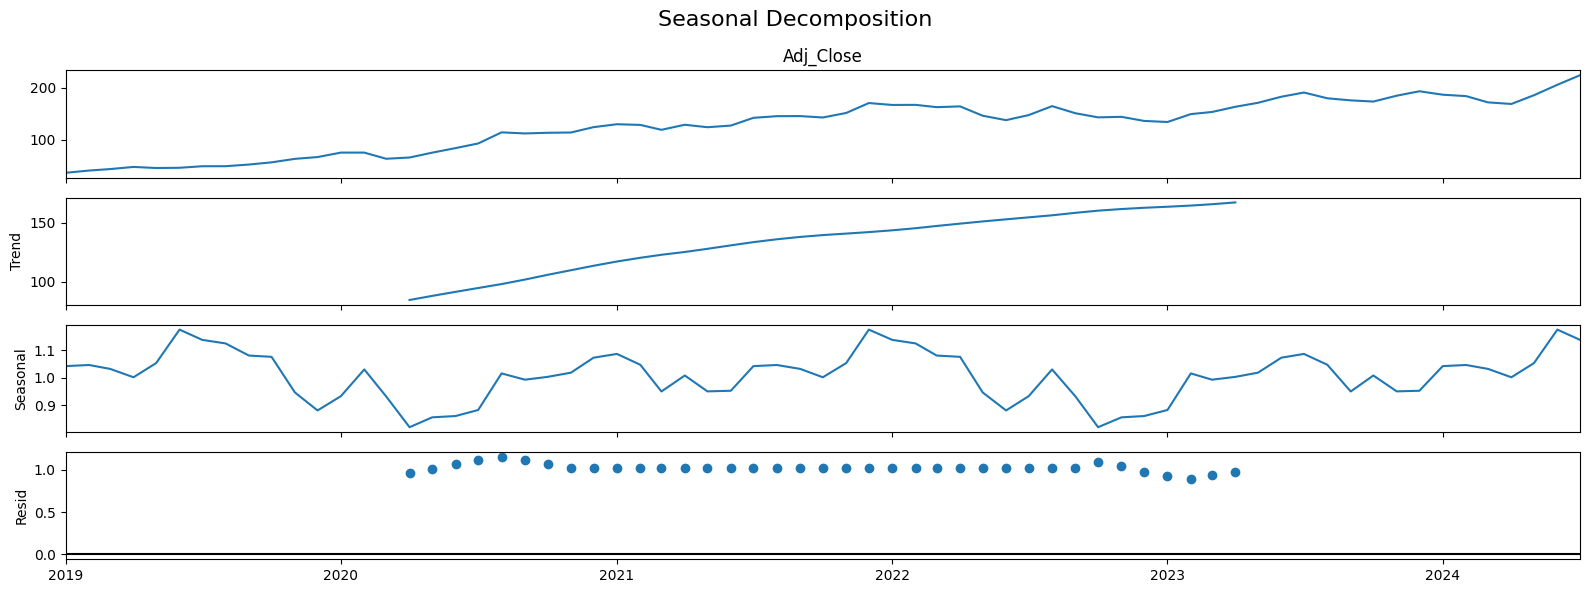

In [21]:
# Define a function for seasonal decomposition
def seasonal_decomposition(ticker_df, ticker = None, period = 30, model = "multiplicative"):
    """
    Performs seasonal decomposition for the given data of a ticker.
    
    Parameters:
    - ticker_df: DataFrame containing the stock data for the ticker
    - ticker: The name of the ticker (for plot title)
    - period: The period for decomposition (default is 30)
    - model: The type of decomposition model ("multiplicative" or "additive")
    """
    result = seasonal_decompose(ticker_df["Adj_Close"], model = model, period = period)

    # Create and display the plot
    fig = result.plot()
    fig.set_size_inches(16, 6)
    
# Optionally, use the ticker name in the title
    if ticker:
        plt.suptitle(f"Seasonal Decomposition of {ticker}", fontsize=16)
    else:
        plt.suptitle("Seasonal Decomposition", fontsize=16)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

seasonal_decomposition(aapl_df)

We can see that there exists a trend and seasonality visible. This also speaks for the dataset being stationary. Additionally it can be derived that there is a high, but pretty constant variance.  
To reduce the magnitude of the values and reduce the rising trend in the series, we can use the log transformation or Box-Cox transformation to stabilize variance. This can again be plotted again by calculating the rolling mean

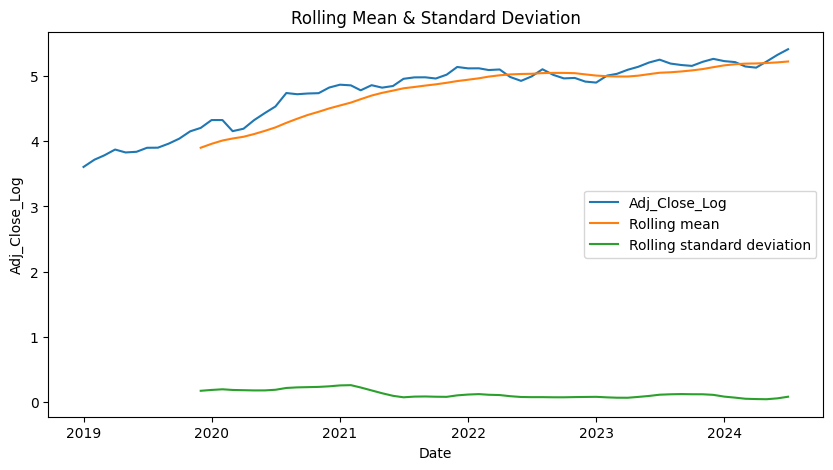

In [22]:
# Calculate the log data for "Adj_Close" and store it in a new column "Adj_Close_Log"
aapl_df["Adj_Close_Log"] = np.log(aapl_df["Adj_Close"])

rol_mean = aapl_df["Adj_Close_Log"].rolling(window = 12).mean()
rol_std = aapl_df["Adj_Close_Log"].rolling(window = 12).std()

plt.figure(figsize = (10, 5))
sns.lineplot(data = aapl_df, x = aapl_df.index, y = aapl_df["Adj_Close_Log"], label = "Adj_Close_Log")
sns.lineplot(data = aapl_df, x = aapl_df.index, y = rol_mean, label = "Rolling mean")
sns.lineplot(data = aapl_df, x = aapl_df.index, y = rol_std, label = "Rolling standard deviation")
plt.legend()
plt.title("Rolling Mean & Standard Deviation")
plt.tight_layout
plt.show()

In [23]:
adf_test(aapl_df.Adj_Close_Log)

ADF-Test on ""
ADF Test Statistic            -2.005
p-value                        0.284
Lags used                      2.000
Number of Observations used   64.000
Critical Value (1%)           -3.537
Critical Value (5%)           -2.908
Critical Value (10%)          -2.591



Now the trend is still visible, but the variance has decreased. The remaining problem is, that the data is still not stationary, since the p-value of the ADF test is still  0.284 > 0.05.  
Therefore we can try to difference the set, to make the dataset stationary.

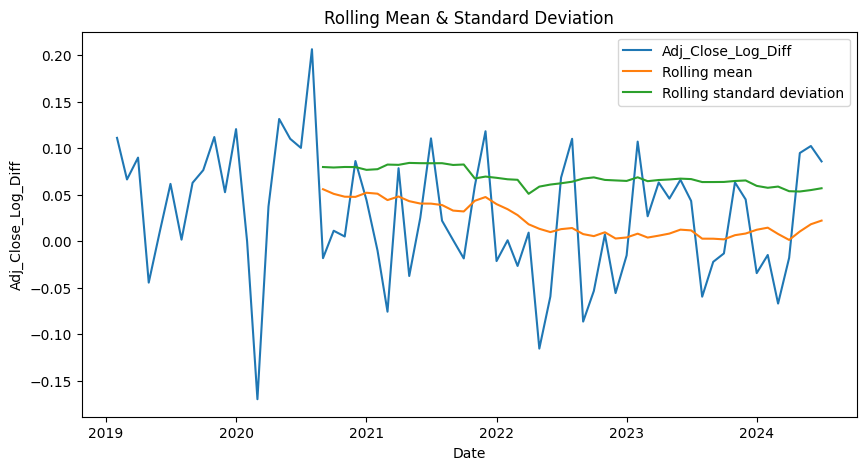

In [24]:
# Calculate the differenced log data for "Adj_Close_Log" and store it in a new column "Adj_Close_Log_Diff"
aapl_df["Adj_Close_Log_Diff"] = aapl_df["Adj_Close_Log"].diff()

# Calculate the Diff data for "Adj_Close" and store it in a new column "Adj_Close_Diff"
aapl_df["Adj_Close_Diff"] = aapl_df["Adj_Close"].diff()

rol_mean = aapl_df["Adj_Close_Log_Diff"].rolling(window = 20).mean()
rol_std = aapl_df["Adj_Close_Log_Diff"].rolling(window = 20).std()

plt.figure(figsize = (10, 5))
sns.lineplot(data = aapl_df, x = aapl_df.index, y = aapl_df["Adj_Close_Log_Diff"], label = "Adj_Close_Log_Diff")
sns.lineplot(data = aapl_df, x = aapl_df.index, y = rol_mean, label = "Rolling mean")
sns.lineplot(data = aapl_df, x = aapl_df.index, y = rol_std, label = "Rolling standard deviation")
plt.legend()
plt.title("Rolling Mean & Standard Deviation")
plt.tight_layout
plt.show()

In [25]:
adf_test(aapl_df["Adj_Close_Log_Diff"].dropna())

ADF-Test on ""
ADF Test Statistic            -5.814
p-value                        0.000
Lags used                      1.000
Number of Observations used   64.000
Critical Value (1%)           -3.537
Critical Value (5%)           -2.908
Critical Value (10%)          -2.591



Now the p-value is 0.00 < 0.05, which makes the dataset stationary.

Before we creating the ARIMA model we need to split our dataset into a train set and a test set, containing the adjusted closing price.

In [26]:
# Allocate the first 80% of the dataset to the train set
train_size = int(len(aapl_df) * 0.8)

train_set_aapl = aapl_df.iloc[:train_size]
test_set_aapl = aapl_df.iloc[train_size:]

print(f"Length Full Set: {len(aapl_df)}")
print(f"Length Train Set: {len(train_set_aapl)}")
print(f"Length Test Set: {len(test_set_aapl)}")

Length Full Set: 67
Length Train Set: 53
Length Test Set: 14


Now the split data set does have 1122 entries in the train set and 281 entries in the test set, both maintaining the dependency of the dates.  
This is how the split of the dataset looks visualized.

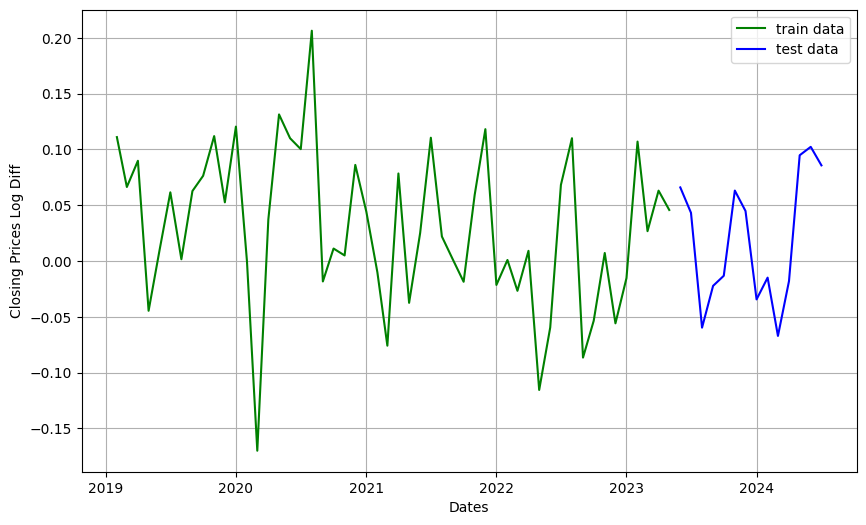

In [27]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Closing Prices Log Diff")
plt.plot(train_set_aapl["Adj_Close_Log_Diff"], "green", label = "train data")
plt.plot(test_set_aapl["Adj_Close_Log_Diff"], "blue", label = "test data")
plt.legend()

Now that we could make our dataset stationary through differencing and splitting it into a train and test set, we next have to find out the order of the ARIMA model (p, d, q):

p: Periods to lag for eg: (if p = 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation, p = 3 means that the data is dependend on past 3 periods).
To find the value for p, we can plot the PACF of the ```Adj_Close__Log_Diff``` column (as seen below). If the PACF plot cuts off sharply at a particular lag (e.g. 1 or 2), that lag is a good candidate for p.  

d: In an ARIMA model, the value of d refers to the number of differencing transformations required by the time series to get stationary (a series without trend or seasonality).  
Since we only needed the first difference time series, we set it to d = 1.  

q: This variable denotes the lag of the error component, where error component is a part of the time series not explained by trend or seasonality.  
For the value of q, we can plot the ACF plot. If the ACF plot cuts off sharply after a certain number of lags, that lag is a good candidate for q.  

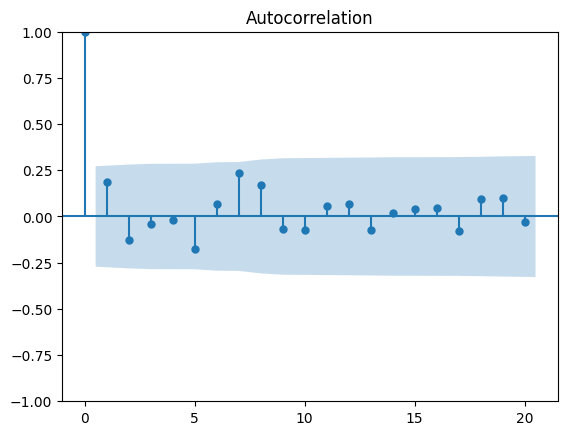

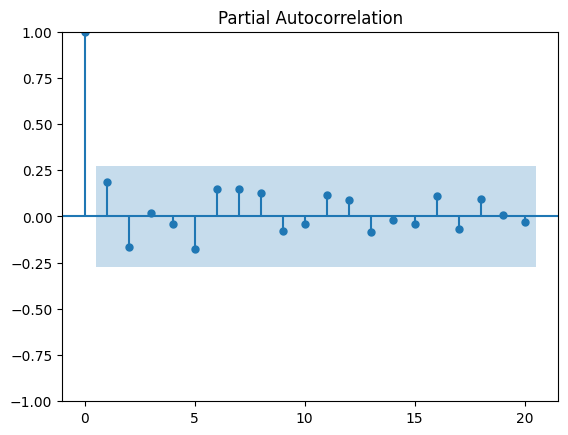

In [28]:
acf_diff = plot_acf(train_set_aapl["Adj_Close_Log_Diff"].dropna(), lags = 20)
pacf_diff = plot_pacf(train_set_aapl["Adj_Close_Log_Diff"].dropna(), lags = 20)

The inital order we use for the ARIMA model could be ```order = (0, 1, 0)```, according to the ACF and PACF plots.  
Of course these numbers can differ later on to improve the performance of the model, but it is a solid starting point to train the model on our train set.  
The other input required for the ARIMA model is a dataset. In this case, it now is the ```train_set_aapl``` with the ```Adj_Close``` column, since we want the model to train on these inputs.

Another way is to try to minimize the AIC value by trying different combinations of order values. This is computational more demanding, especially with larger datasets, but in our case it works just fine.  
As we can see below, the values are pretty similiar to the ones we derived from the ACF and PACF plot, with a small difference in the q value, which is why we use the calculated tuple for further processing.
Using the library of "Auto ARIMA" is also a possible solution, let's look and compare both methods.

In [29]:
# Introduce start value and end value for the period we want to predict
start_index = len(train_set_aapl)
end_index = start_index + len(test_set_aapl) - 1

# Define the range to test our values
p = range(0, 8)
q = range(0, 8)
d = range(0, 1)

# Create all possible tuple combinations of p, d, and q
pdq_combination_1 = list(itertools.product(p, d, q))

# Create empty lists to store the values of the loop
aic_values_1 = []
order_1 = []

# Iterate over each possible tuple combination
for p, d, q in pdq_combination_1:
    try:
        model = ARIMA(train_set_aapl["Adj_Close"], order = (p, d, q)).fit()
        # Store the AIC value instead of RMSE
        order_1.append((p, d, q))
        aic_values_1.append(model.aic)
    except Exception as e:
        print(f"An error occurred for order ({p}, {d}, {q}): {e}")

# Add the results to a DataFrame
results_pdq_1 = pd.DataFrame(index = order_1, data = aic_values_1, columns = ["AIC"])

# Find the row with the lowest AIC value
min_aic_row_1 = results_pdq_1["AIC"].idxmin()
print(f"The tuple with the lowest AIC score is: {min_aic_row_1}")

The tuple with the lowest AIC score is: (1, 0, 1)


In [30]:
auto_model = pm.auto_arima(train_set_aapl["Adj_Close"], start_p = 1, start_q = 1,
                      test="adf", # use adftest to find optimal 'd'
                      m = 12, # frequency of series
                      d = None, # let model determine 'd'
                      seasonal = True, # Use Seasonality
                      information_criterion = "aic",
                      error_action = "ignore",
                      suppress_warnings = True,
                      stepwise = True)

auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   53
Model:             SARIMAX(3, 2, 0)x(2, 0, 0, 12)   Log Likelihood                -181.731
Date:                            Thu, 12 Sep 2024   AIC                            375.461
Time:                                    13:02:36   BIC                            387.052
Sample:                                01-01-2019   HQIC                           379.890
                                     - 05-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5439      0.141     -3.846      0.000      -0.821      -0.267
ar.L2         -0.5589      0.144     -3.884      0.000      -0.841      -0.277
ar.L3         -0.2594      0.150     -1.728      0.084      -0.554       0.035
ar.S.L12       0.0586      0.180      0.326      0.744      -0.294       0.411
ar.S.L24       0.3245      0.201      1.614      0.106      -0.069       0.718
sigma2        68.0268     16.260      4.184      0.000      36.158      99.895
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.93   Prob(JB):                         0.82
Heteroskedasticity (H):               3.38   Skew:                            -0.13
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As we can see, trying out different orders can lead to different results. According to this, the best order for minimizing the AIC is (1, 0, 1), Auto-ARIMA tells us that (3, 2, 0) is the best order.  
The first proposal doesn't seem to make sence, since there is no differencing, which is why we stay with the original order of (0, 1, 0).

In [31]:
model = ARIMA(train_set_aapl["Adj_Close"], order = (0, 1, 0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                   53
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -184.282
Date:                Thu, 12 Sep 2024   AIC                            370.564
Time:                        13:02:36   BIC                            372.515
Sample:                    01-01-2019   HQIC                           371.312
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        70.0984     13.446      5.213      0.000      43.744      96.453
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.38   Prob(JB):                         0.93
Heteroskedasticity (H):               2.94   Skew:                            -0.07
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now we can see a summary of the fitted model. Especially important are the following statistics:
- Sigma2: this represents the variance of the residual values, lower is better
- Log Likelihood: this is maximum likelihood estimation for the ARIMA model, higher is better
- AIC: a measure of the goodness of fit and the parsimony of the model, lower is better

Before continuing with the prediction of future values, a quick looking at the residuals provides us insights wheter our model has captured adequate data. If it did, its residuals should look like white noise.  

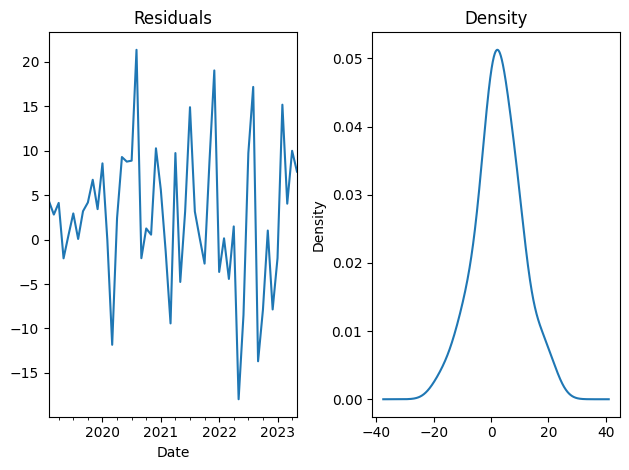

In [32]:
# Calculating the residuals of the model
residuals = model_fit.resid[1:]

# Plotting the Residuals and the Density Curve
fig, ax = plt.subplots(1, 2)
residuals.plot(title = "Residuals", ax = ax[0]) 
residuals.plot(title = "Density", kind = "kde", ax = ax[1])
plt.tight_layout()
plt.show()

By looking at the plots, we can see that the residuals look like white noise, which means that this sequence of random data points are uncorrelated.
The densitiy also does look normally distributed with a mean around zero, which is a good indicator for the model and exactly what we want.  

We want the residuals primarily to be interpreted as white noise. If the residuals (errors) of a model resemble white noise, it indicates that the model has captured all the patterns and structure from the data, and what remains is just random and unpredictable noise.  

To ensure this we can plot the autocorrelation and the partial autocorrelation once again, which should prove that the residuals being resembled are white noise.
After taking a look at the ACF and the PACF, they barely show any significant spikes and noone is outside the significance area, which indicates that the residuals can indeed be interpreted as white noise.  

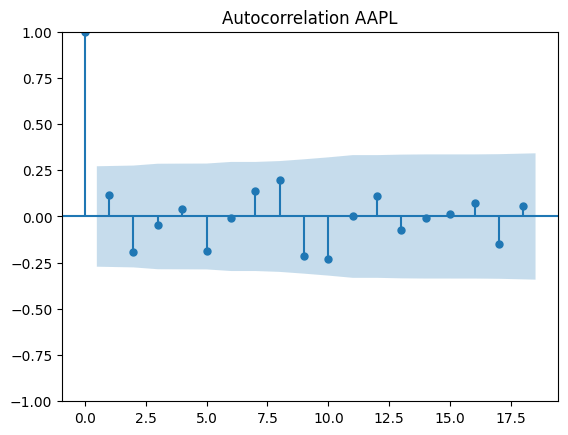

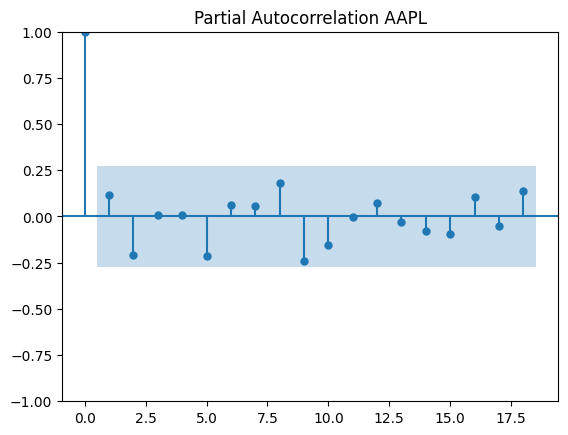

In [33]:
# Plotting Autocorrelation
acf_res = plot_acf(residuals, title = "Autocorrelation AAPL")

# Plotting Partial Autocorrelation
pacf_res = plot_pacf(residuals, title = "Partial Autocorrelation AAPL")

Now we can go on and make predictions with the ARIMA model. In the beginning we want our model to predict its own values, so we can compare it to the actual values of the train_set period.

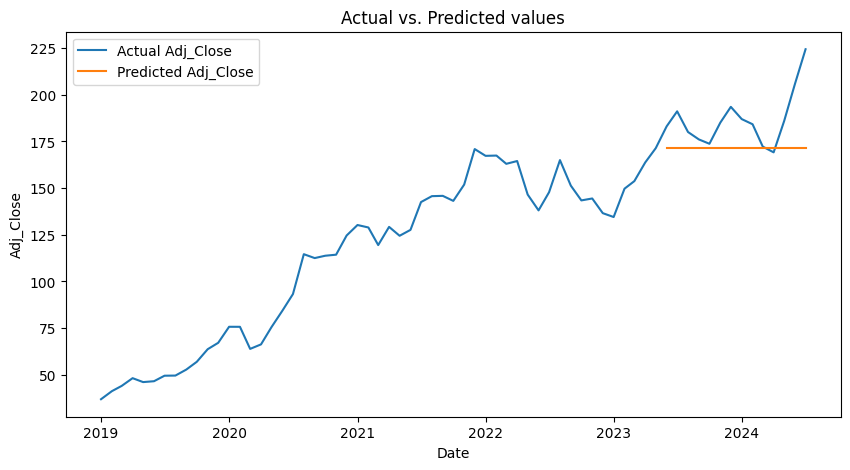

In [34]:
# Introduce start value and end value for theh period we want to predict
start_index = len(train_set_aapl)
end_index = start_index + len(test_set_aapl) - 1

# Make the prediction and store it into variable "prediction"
predictions = model_fit.predict(start = start_index, end = end_index)


# Ensure the column "ARIMA_Pred" exists in the DataFrame
if "ARIMA_Pred" not in aapl_df.columns:
    aapl_df["ARIMA_Pred"] = np.nan  # Initialize with NaN values
    
# Now add the prediction values to the dataframe 
aapl_df.iloc[train_size:, aapl_df.columns.get_loc("ARIMA_Pred")] = predictions.values

# Plot the predicted values in comparison to the actual values
plt.figure(figsize = (10, 5))
sns.lineplot(data = aapl_df, x = aapl_df.index, y = aapl_df["Adj_Close"], label = "Actual Adj_Close")
sns.lineplot(data = aapl_df, x = aapl_df.index, y = aapl_df["ARIMA_Pred"], label = "Predicted Adj_Close")
plt.legend()
plt.title("Actual vs. Predicted values")
plt.tight_layout
plt.show()

Here we can see that the model does predict the values for the period of the test_set does not perform greatly. To measure the perfomance mathematically, we can calculate the Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE).

In [35]:
mse = mean_squared_error(test_set_aapl["Adj_Close"], predictions)
rmse = np.sqrt(mse)
avg_close = test_set_aapl["Adj_Close"].mean()
print("MSE: ", mse)
print("RMSE: ", rmse)
print("Avg_Close: ", avg_close)

MSE:  424.62035690486175
RMSE:  20.606318373374265
Avg_Close:  186.57675004521462


MSE: An MSE of 424.62 indicates that, on average, the squared differences between the predicted and actual closing prices are 424.62. This means that the discrepancies between predictions and actual values are relatively large in squared terms.  
RMSE: Meaning: An RMSE of 20.61 means that, on average, the predicted closing prices deviate from the actual closing prices by approximately $20.61, or generally 20.61 units. This measure is more intuitive as it is expressed in the same units as the stock prices.  

Given that the average closing price is 186.58, an RMSE of 20.61 suggests that the model's predictions are, on average, about 20.61 units off from the actual values.  

We can also see in the plot that the ARIMA model might not be the best model to predict stock data. Because of that, we will try the SARIMAX model and see, if it performs better.  
The difference between the ARIMA and the SARIMA model is, that it designed to handle data with seasonal patterns. It captures both short-term and long-term dependencies within the data, making it a robust tool for forecasting.  
The components are the same as in the ARIMA model with an additional seasonal part and it looks like this: SARIMA(p, d, q)(P, D, Q, s):
- p, d, q are the same as in the ARIMA model.
- Seasonal AR(P): Seasonal autoregressive component of order P
- MA(Q): Seasonal moving average component of order Q
- Seasonal I(D): Seasonal integrated component of order D
- s: Seasonal period

One advantage is, that P, D, and Q can also be derived from the PACF and ACF plots, with a ```Adj_Close_Diff12``` as input. This column computes the 12 month difference for the ```Adj_Close``` column and is needed to find seasonality

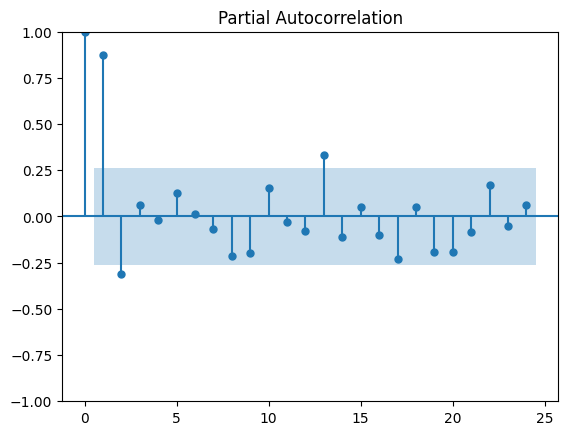

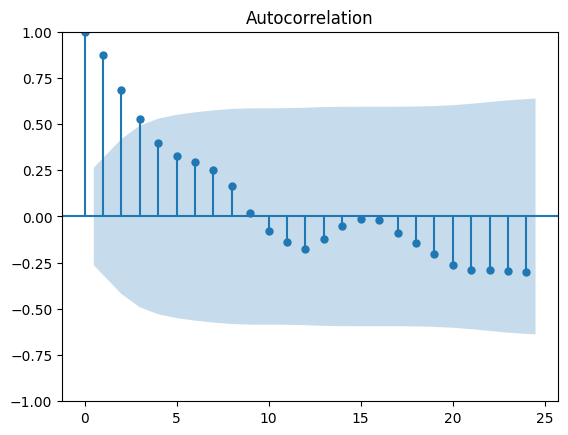

In [36]:
# Create a new column Adj_Close_12Diff
aapl_df["Adj_Close_Diff12"] = aapl_df["Adj_Close"].diff(12)

# Plot ACF and PACF
plot_pacf(aapl_df["Adj_Close_Diff12"].dropna(), lags = 24);
plot_acf(aapl_df["Adj_Close_Diff12"].dropna(), lags = 24);

For the SARIMA model, these plots can be derived similiar to the ARIMA model. Accordingly, we would set P to P = 2, Q to Q = 2 and D to D = 1. The seasonal period will be set to s = 12, since we want to have a monthly seasonality.  
On the other hand, we could again try to compute the values by trying different orders. Since they are more reliable by reducing the AIC, we will use them.

In [37]:
# Introduce start value and end value for the period we want to predict
start_index = len(train_set_aapl)
end_index = start_index + len(test_set_aapl) - 1

# Define the range to test our values for both non-seasonal and seasonal components
p = range(0, 1)
d = range(1, 2)
q = range(0, 1)
P = range(0, 3)
D = range(0, 1)
Q = range(0, 3)
m = 12  # Assume monthly seasonality, adjust based on your data

# Create all possible tuple combinations of p, d, q for both non-seasonal and seasonal components
pdq_combination_2 = list(itertools.product(p, d, q))
seasonal_pdq_combination_2 = list(itertools.product(P, D, Q))

# Create empty lists to store the values of the loop
aic_values_2 = []
order_2 = []
seasonal_order_2 = []

# Iterate over each possible tuple combination for SARIMA
for p, d, q in pdq_combination_2:
    for P, D, Q in seasonal_pdq_combination_2:
        try:
            # Fit the SARIMA model with both non-seasonal and seasonal orders
            model = SARIMAX(train_set_aapl["Adj_Close"], order = (p, d, q),
                            seasonal_order = (P, D, Q, m)).fit()

            # Store the AIC value instead of RMSE
            order_2.append((p, d, q))
            seasonal_order_2.append((P, D, Q, m))
            aic_values_2.append(model.aic)
        except Exception as e:
            print(f"An error occurred for order ({p}, {d}, {q}) and seasonal order ({P}, {D}, {Q}, {m}): {e}")

# Add the results to a DataFrame
results_pdq_2 = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(zip(order_2, seasonal_order_2))),
                           data = aic_values_2, columns = ["AIC"])

# Find the row with the lowest AIC value
min_aic_row_2 = results_pdq_2["AIC"].idxmin()
print(f"The tuple with the lowest AIC score is: {min_aic_row_2}")

The tuple with the lowest AIC score is: ((0, 1, 0), (0, 0, 0, 12))


Here the same, problem with the ARIMA model appears, where the orders for P, D, Q, s (here: (0, 0, 0, 12)) mostly don't make sense. After trying different orders, the order of (0, 1, 0)x(2, 1, 2, 12)) seem to  
represent the curve the best, besides reducing the RMSE the most, which is why we continue to use this.

In [38]:
# The start value and end value remain the same:
start_index = len(train_set_aapl)
end_index = start_index + len(test_set_aapl) - 1

model_s = SARIMAX(train_set_aapl["Adj_Close"], order = (0, 1, 0), seasonal_order = (2, 1, 2, 12))
model_s_fit = model_s.fit()

# Make the prediction and store it into variable "predictions_s"
predictions_s = model_s_fit.predict(start = start_index, end = end_index)

# Ensure the column "ARIMA_Pred" exists in the DataFrame
if "SARIMA_Pred" not in aapl_df.columns:
    aapl_df["SARIMA_Pred"] = np.nan  # Initialize with NaN values
    
# Now add the predictions_s values to the dataframe
aapl_df.iloc[start_index:end_index + 1, aapl_df.columns.get_loc("SARIMA_Pred")] = predictions_s.values

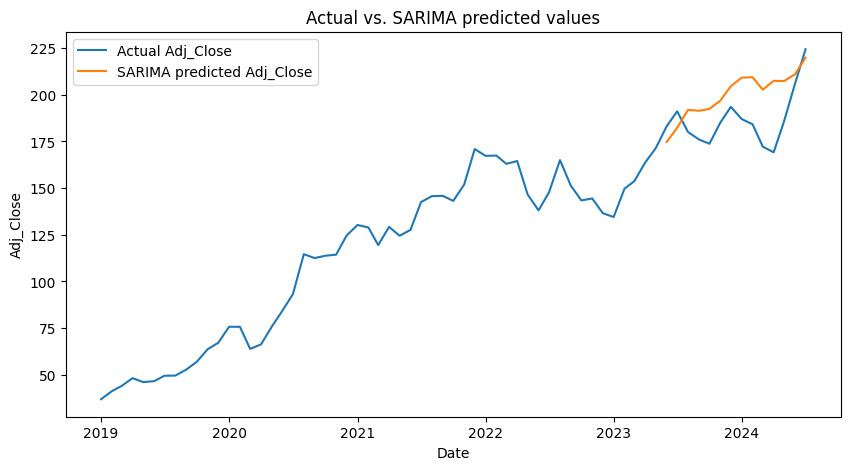

In [39]:
# Plot the predicted values in comparison to the actual values
plt.figure(figsize = (10, 5))
sns.lineplot(data = aapl_df, x = aapl_df.index, y = aapl_df["Adj_Close"], label = "Actual Adj_Close")
sns.lineplot(data = aapl_df, x = aapl_df.index, y = aapl_df["SARIMA_Pred"], label = "SARIMA predicted Adj_Close")
plt.legend()
plt.title("Actual vs. SARIMA predicted values")
plt.tight_layout
plt.show()

This plot shows graphically that the SARIMA model isn't just a flat line anymore, but can predict that the stock price will rise over the time, even though it does not represent the final increase very well.  
To see if it still performs better than the ARIMA model, we will once again calculate the RMSE.

In [40]:
mse = mean_squared_error(test_set_aapl["Adj_Close"], predictions_s)
rmse = np.sqrt(mse)
avg_close = test_set_aapl["Adj_Close"].mean()
print("MSE:", mse)
print("RMSE:", rmse)
print("Avg_Close:", avg_close)

MSE: 369.2382348122791
RMSE: 19.215572716218453
Avg_Close: 186.57675004521462


These numbers show us, that our SARIMA model performs slightly better than the ARIMA model.
Nonetheless, the high MSE and RMSE probably result from the dip in Spring 2024, which, as already stated, is not represented very well, which is why e.g. neural networks are even better models.  
The problem with both models is, that the underlying pattern usually is linear for these models. Stock data however, can only in rare occasions be called linear, basically never.  
Anyway, since we can see a trend in the SARIMA model, in comparison to the ARIMA model, we will use this model for making predictions about the values for the next 6 months. To do so we now can use the original dataset.

In [41]:
# Set a specific period we want to predict the Adj_Close price for
future_values = pd.DataFrame(pd.date_range(start = "2024-08-01", end = "2025-02-28", freq = "MS"), columns = ["Dates"])
# Set the index to the "Dates" column
future_values.set_index("Dates", inplace = True)

# Re-fit the SARIMAX model on the entire dataset to ensure continuity
model_s_full = SARIMAX(aapl_df["Adj_Close"], order = (0, 1, 0), seasonal_order = (2, 1, 2, 12))
model_s_full_fit = model_s_full.fit()
# Predict future values for the period given in future_values
predictions_future = model_s_full_fit.predict(start = len(aapl_df), end = len(aapl_df) + len(future_values) - 1)

# Add these predictions to the future_values DataFrame
future_values["SARIMA_Pred"] = predictions_future.values

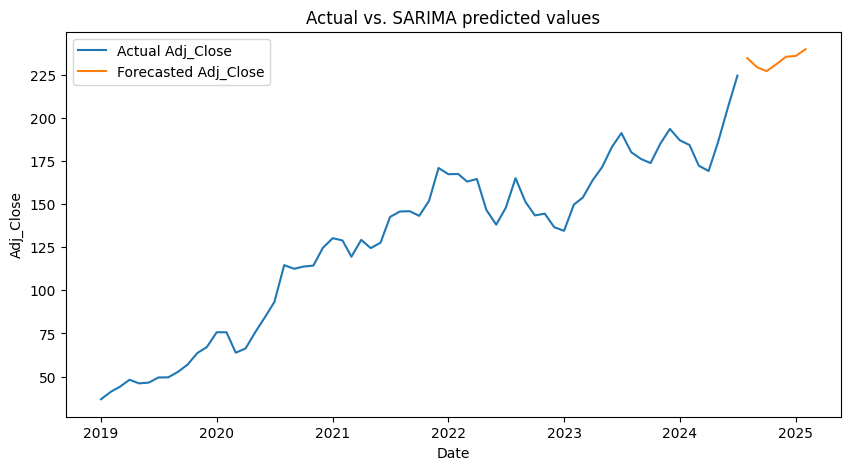

In [42]:
# Plot the predicted values in comparison to the actual values
plt.figure(figsize = (10, 5))
sns.lineplot(data = aapl_df, x = aapl_df.index, y = aapl_df["Adj_Close"], label = "Actual Adj_Close")
sns.lineplot(data = future_values, x = future_values.index, y = future_values["SARIMA_Pred"], label = "Forecasted Adj_Close")
plt.legend()
plt.title("Actual vs. SARIMA predicted values")
plt.tight_layout
plt.show()

In [43]:
future_values

,SARIMA_Pred
Dates,
2024-08-01,234.631
2024-09-01,229.336
2024-10-01,227.063
2024-11-01,231.129
2024-12-01,235.411
2025-01-01,235.909
2025-02-01,239.786


As it can be seen, its rough to make predictions of stock data with ARIMA or SARIMA models, which is why we might improve the performance by tuning the hyperparameters or use other models, e.g. LSTM or other Neural Networks.  
Another possibilty would be to expand the period of the fetched data to feed more data to the model. We could also try to change the scale of the data, e.g. from daily to monthly. This might also help the model to infer the structure more easily.  
But the way it is now, it does give a first little insight to how the stock data might behave on average in the future.

# 3. Summary

To summarize this project, we captured stock price data of four randomly selected companies for the last five years, manipulated the data and prepared it in a way that it is possible to use it for forecasting models.  
By doing so, we first plotted the data to gain valuable insights, e.g. which is the company with the highest trading volume. Before using the data for our models, only one company, in this case "AAPL", was selected to perform further preparations.  
Such preparations were for example to check whether the dataset was stationary or not. Since it wasn't, we had to take the difference of the ```Adj_Close``` column in the dataset, so it became stationary.  
Afterwards, we calculated the order, which is required for either ARIMA and SARIMA models, by looking at the ACF and PACF plots. Finally, we split our data into a train_set and a test_set.  
The train_set was used to train the model on, the test_set was used to compare the performance of the model to the actual values.  
The performance was measured by calculating the RMSE, in which the ARIMA model outperformed the SARIMA model. The problem was, that the ARIMA model didn't reflect the final increase of the stock price.  
To further improve the performances, you could try to adjust the order values or simply use a different approach with different models.

In [44]:
# Python Version
!python --version

Python 3.11.7
